In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
import os

sys.path.append(os.path.abspath("/Users/samsongourevitch/Documents/Chlamy_Project_Github/Chlamy_project"))

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Scripts import Data_v2
from Scripts import Data_analysis_func
from Scripts import Model_checks
import seaborn as sns
from scipy.stats import multivariate_normal
from sklearn.linear_model import LinearRegression
from Scripts import Outlier_detection_v2
from Scripts import Genes_self_similarity_v2
from matplotlib_venn import venn2, venn2_circles
from Scripts import Feature_engineering
from Scripts import Clusters
from tqdm import tqdm

In [13]:
data = Data_v2.get_format_data_new_database(phase='phase1')

/Users/samsongourevitch/Documents/Chlamy_Project_Github/Chlamy_project/Scripts/Data_v2.py:197: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['elapsed_time_0'] = 0
/Users/samsongourevitch/Documents/Chlamy_Project_Github/Chlamy_project/Scripts/Data_v2.py:199: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'elapsed_time_{i}'] = (data[col] - data[time_columns[0]]).dt.total_seconds() / 3600
/Users/samsongourevitch/Documents/Chlamy_Project_Github/Chlamy_project/Scripts/Data_v2.py:199: PerformanceWarning: DataFrame is highly 

In [183]:
data['plate'].value_counts()

plate
99    3064
2     2298
20    2298
1     2298
23    2298
22    2298
21    2298
18    2298
8     2298
16    2298
15    2298
14    2298
13    2298
11    2298
10    2298
9     2298
3     2298
24    2010
12    1915
17    1915
7     1915
6     1915
5     1915
4     1532
Name: count, dtype: int64

## Sanity checks

### Checking the evolution of $\frac{F_v}{F_m}$ to assess consistency of measurements over time

<Axes: title={'center': 'Evolution of fv_fm Over Time (Daily Aggregation)'}, xlabel='Date', ylabel='fv_fm Value'>

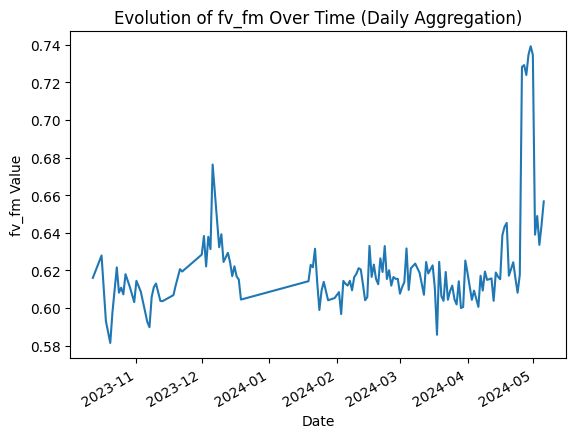

In [184]:
# Group by date and aggregate fv_fm values
daily_aggregated = data.groupby('start_date')['fv_fm'].mean()

# Plot the aggregated fv_fm values over time
daily_aggregated.plot(kind='line', xlabel='Date', ylabel='fv_fm Value', title='Evolution of fv_fm Over Time (Daily Aggregation)')


In [138]:
data_WT_not_99 = data[(data['mutant_ID'] == 'WT') & (data['plate'] != '99')]

In [139]:
data[(data['mutant_ID'] == 'WT') & (data['plate'] == '24') & (data['light_regime'] == '20h_HL')]['fv_fm']

49387    0.702605
49451    0.692578
49495    0.723706
Name: fv_fm, dtype: float32

In [140]:
data[(data['mutant_ID'] == 'CC4533') & (data['plate'] == '24') & (data['light_regime'] == '20h_HL')]['fv_fm']

49404    0.710793
49502    0.717657
49526    0.757363
49531    0.730324
49533    0.725291
49538    0.691019
Name: fv_fm, dtype: float32

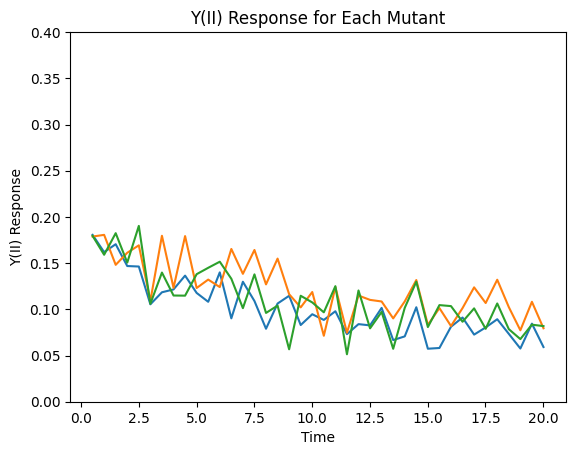

In [141]:
Data_analysis_func.plot_y2(data[(data['mutant_ID'] == 'WT') & (data['plate'] == '5') & (data['light_regime'] == '20h_HL')], limit=[0, 0.4])

In [84]:
min = data[(data['plate'] == '24')]['start_date'].min()
max = data[(data['plate'] == '24')]['start_date'].max()

In [85]:
min

Timestamp('2024-04-26 00:00:00')

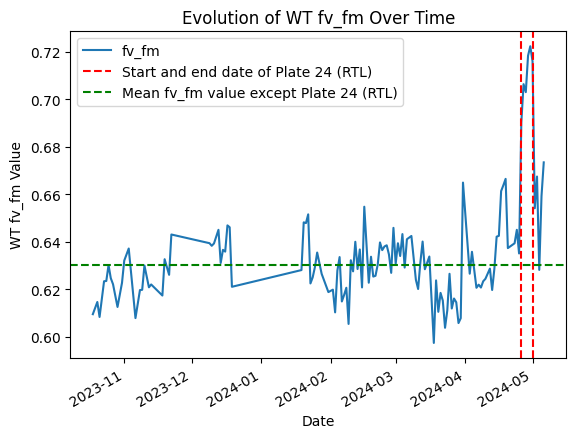

In [142]:
# daily_aggregated_WT = data_WT_not_99[data_WT_not_99['light_regime'] == '20h_HL'].groupby('start_date')['mean_y2'].mean()
daily_aggregated_WT = data_WT_not_99.groupby('start_date')['fv_fm'].mean()

daily_aggregated_WT.plot(kind='line', xlabel='Date', ylabel='WT fv_fm Value', title='Evolution of WT fv_fm Over Time')

# get the min and max start date of plate 24
min = data[(data['plate'] == '24')]['start_date'].min()
max = data[(data['plate'] == '24')]['start_date'].max()

# draw vertical lines at the min and max start date of plate 24
plt.axvline(min, color='r', linestyle='--')
plt.axvline(max, color='r', linestyle='--', label='Start and end date of Plate 24 (RTL)')

# draw a horizontal line at the mean fv_fm value of plate 24
plt.axhline(data_WT_not_99[data_WT_not_99['plate'] != '24']['fv_fm'].mean(), color='g', linestyle='--', label='Mean fv_fm value except Plate 24 (RTL)')

# add a legend
plt.legend()

### Checking the distribution of $\frac{F_v}{F_m}$ in the WT plate

In [181]:
data_WT = data[data['mutant_ID'] == 'WT']

In [182]:
data_WT['measurement'].value_counts()

measurement
M5    832
M1    823
M6    467
M4    446
M2    446
M3    443
Name: count, dtype: int64

In [152]:
data_WT_without_M6 = data_WT[(data_WT['measurement'] != 'M6') & (data_WT['plate'] != '24')]

In [146]:
data_WT_without_M6['mean_y2'].mean()

0.3454350873351761

In [147]:
data_WT_M6 = data_WT[data_WT['measurement'] == 'M6']

In [148]:
data_WT_M6['mean_y2'].mean()

0.40134056581088345

Text(0.5, 1.0, 'Histogram of fv_fm values for WT')

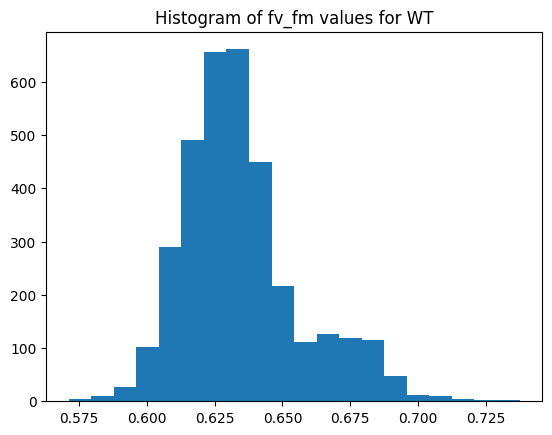

In [153]:
plt.hist(data_WT['fv_fm'], bins=20)
plt.title('Histogram of fv_fm values for WT')

In [154]:
data_WT_without_M6['plate'].value_counts()

plate
99    2681
14      15
1       15
23      15
22      15
21      15
18      15
8       15
16      15
15      15
20      15
11      15
10      15
3       15
2       12
12      12
9       12
6       12
5       12
13      12
7        9
17       9
4        9
Name: count, dtype: int64

Text(0.5, 1.0, 'Histogram of fv_fm values for WT without M6')

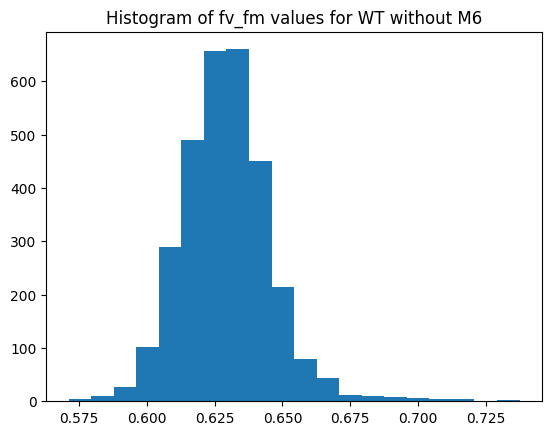

In [188]:
plt.hist(data_WT[~((data_WT['measurement'] == 'M6') & (data_WT['plate'] == '99'))]['fv_fm'], bins=20)
plt.title('Histogram of fv_fm values for WT without M6')

<Axes: title={'center': 'Average fv_fm Value by Measurement Type'}, xlabel='Measurement Type', ylabel='fv_fm Value'>

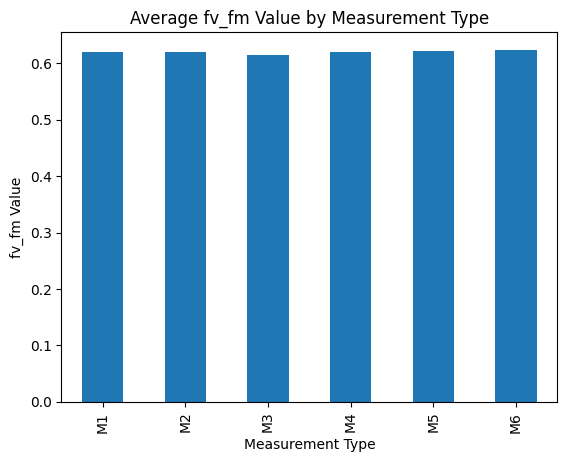

In [189]:
# Group by measurement type

data_grouped = data.groupby('measurement')['fv_fm'].mean()
data_grouped.plot(kind='bar', xlabel='Measurement Type', ylabel='fv_fm Value', title='Average fv_fm Value by Measurement Type')

<Axes: title={'center': 'Average WT fv_fm Value by Measurement Type'}, xlabel='Measurement Type', ylabel='WT fv_fm Value'>

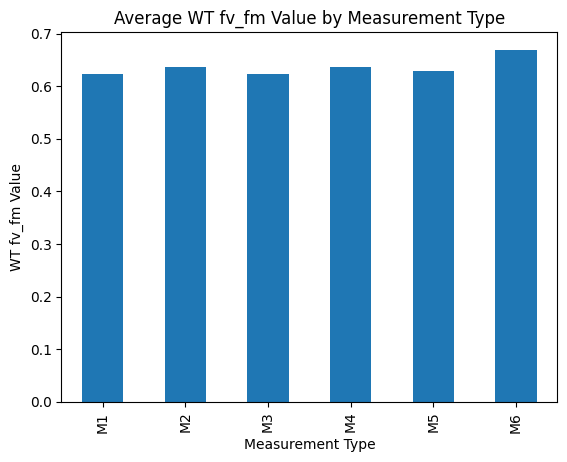

In [180]:
# Group by measurement type

data_grouped_WT = data_WT.groupby('measurement')['fv_fm'].mean()
data_grouped_WT.plot(kind='bar', xlabel='Measurement Type', ylabel='WT fv_fm Value', title='Average WT fv_fm Value by Measurement Type')

In [133]:
data_WT_without_M6

,plate,measurement,start_date,light_regime,dark_threshold,light_threshold,num_frames,i,j,fv_fm,...,elapsed_time_84,elapsed_time_85,elapsed_time_86,elapsed_time_87,elapsed_time_88,elapsed_time_89,well_id_numeric,mean_y2,mean_ynpq,GO
0,99,M1,2023-10-12,1min-1min,17.249313,25.001962,164,0,1,0.616146,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0.363719,0.256794,[]
1,99,M1,2023-10-12,1min-1min,17.249313,25.001962,164,0,2,0.607132,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0.356856,0.253412,[]
2,99,M1,2023-10-12,1min-1min,17.249313,25.001962,164,0,3,0.618476,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0.348922,0.255790,[]
3,99,M1,2023-10-12,1min-1min,17.249313,25.001962,164,0,4,0.593799,...,NaN,NaN,NaN,NaN,NaN,NaN,3,0.336268,0.246571,[]
4,99,M1,2023-10-12,1min-1min,17.249313,25.001962,164,0,5,0.616711,...,NaN,NaN,NaN,NaN,NaN,NaN,4,0.347590,0.254529,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66039,30v3,M7,2024-07-01,1min-5min,16.279873,23.095573,180,2,21,0.686912,...,19.047778,19.464722,19.548333,19.965278,20.048889,20.304722,68,0.418026,0.139865,[]
66149,30v3,M7,2024-07-01,1min-5min,16.279873,23.095573,180,7,11,0.683300,...,19.047778,19.464722,19.548333,19.965278,20.048889,20.304722,178,0.432028,0.063589,[]
66284,30v3,M7,2024-07-01,1min-5min,16.279873,23.095573,180,13,2,0.635447,...,19.047778,19.464722,19.548333,19.965278,20.048889,20.304722,313,0.390908,0.134736,[]
66293,30v3,M7,2024-07-01,1min-5min,16.279873,23.095573,180,13,11,0.667119,...,19.047778,19.464722,19.548333,19.965278,20.048889,20.304722,322,0.406677,0.120597,[]


(array([  2.,   3.,  10.,  59., 160., 132.,  47.,  16.,   7.,   8.,   3.,
          1.,   1.,   0.,   2.,  18., 149., 364., 375., 445., 487., 539.,
        407., 139.,  49.,  18.,   7.,   3.,   4.,   1.]),
 array([0.10081732, 0.11461819, 0.12841906, 0.14221993, 0.1560208 ,
        0.16982166, 0.18362253, 0.1974234 , 0.21122427, 0.22502513,
        0.238826  , 0.25262687, 0.26642774, 0.2802286 , 0.29402947,
        0.30783034, 0.32163121, 0.33543207, 0.34923294, 0.36303381,
        0.37683468, 0.39063554, 0.40443641, 0.41823728, 0.43203815,
        0.44583901, 0.45963988, 0.47344075, 0.48724162, 0.50104248,
        0.51484335]),
 <BarContainer object of 30 artists>)

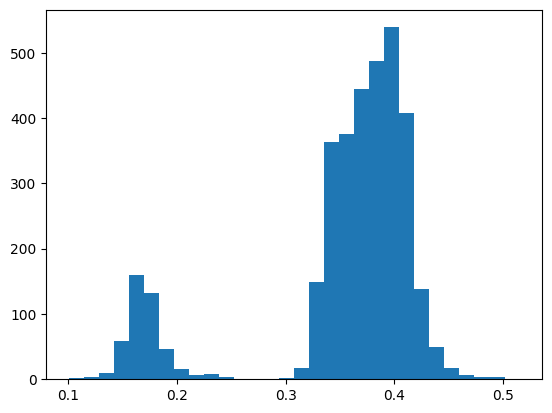

In [157]:
plt.hist(data_WT['mean_y2'], bins=30)

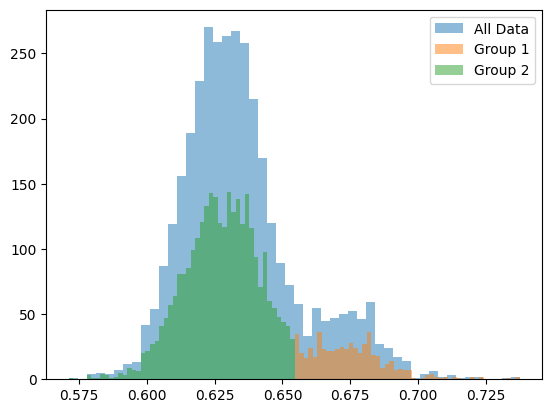

/var/folders/1m/j6l58hd9755c0h_89l4yckhw0000gn/T/ipykernel_11057/3668595566.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_WT_na['group'] = labels


In [170]:
# group the data into 2 groups based on mean_y2 value using GMM
from sklearn.mixture import GaussianMixture

data_WT_na = data_WT.dropna(subset=['fv_fm'])

# Reshape the data
fv_fm = data_WT_na['fv_fm'].values
fv_fm = fv_fm.reshape(-1, 1)

# Fit a Gaussian Mixture Model
gmm = GaussianMixture(n_components=2)
gmm.fit(fv_fm)

# Predict the labels (which component each sample belongs to)
labels = gmm.predict(fv_fm)

# Separate the data into two groups
group1 = fv_fm[labels == 0]
group2 = fv_fm[labels == 1]

# Plot the original data and the separated groups
plt.hist(fv_fm, bins=50, alpha=0.5, label='All Data')
plt.hist(group1, bins=50, alpha=0.5, label='Group 1')
plt.hist(group2, bins=50, alpha=0.5, label='Group 2')
plt.legend()
plt.show()

# add the labels to the data
data_WT_na['group'] = labels

In [175]:
data_WT_na[data_WT_na['group'] == 0]['measurement'].value_counts()

measurement
M6    395
M2     47
M5     32
M4     32
M1     25
M3     15
Name: count, dtype: int64

In [176]:
data_WT_na[data_WT_na['group'] == 1]['measurement'].value_counts()

measurement
M5    800
M1    798
M3    428
M4    414
M2    399
M6     71
Name: count, dtype: int64

Text(0.5, 1.0, 'Histogram of average Y(II) values for WT without M6')

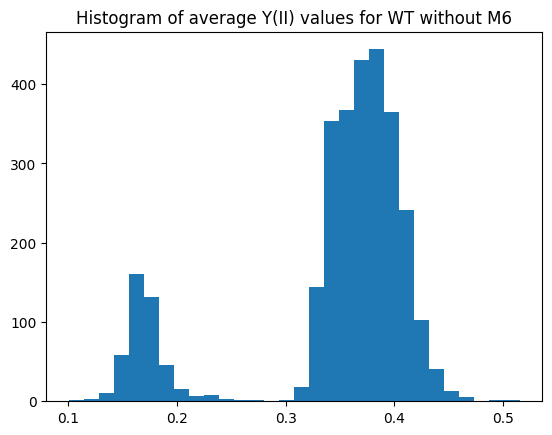

In [158]:
plt.hist(data_WT_without_M6['mean_y2'], bins=30)
plt.title('Histogram of average Y(II) values for WT without M6')

### Checking the variability of $\frac{F_v}{F_m}$ over the plates and measurement types

In [104]:
data_not_WT = data[data['mutant_ID'] != 'WT']

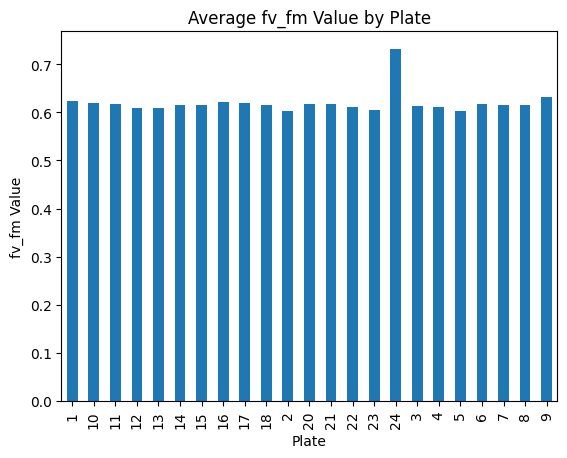

In [105]:
# Check the variability between plates
data_grouped_plate = data_not_WT.groupby('plate')['fv_fm'].mean()
data_grouped_plate.plot(kind='bar', xlabel='Plate', ylabel='fv_fm Value', title='Average fv_fm Value by Plate')

mean, var = data_grouped_plate.mean(), data_grouped_plate.var()

<Axes: >

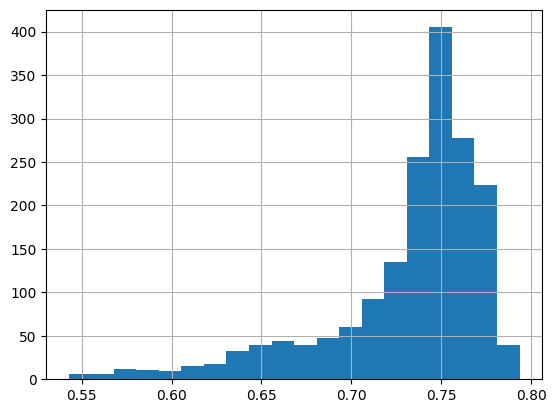

In [121]:
data[data['plate'] == '24']['fv_fm'].hist(bins=20)

In [ ]:
print('Mean:', mean)
print('Variance:', var)

Mean: 0.61200047
Variance: 5.8579102e-05


<AxesSubplot:title={'center':'Average WT fv_fm Value by Measurement Type (Plate 99)'}, xlabel='Measurement Type', ylabel='WT fv_fm Value'>

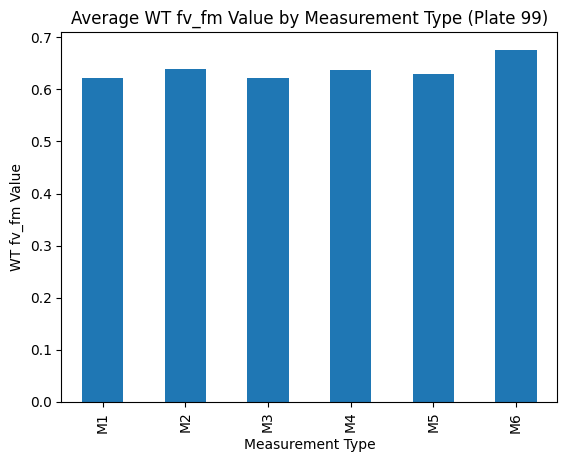

In [ ]:
data_WT_99 = data_WT[data_WT['plate'] == 99]
data_grouped_WT_99 = data_WT_99.groupby('measurement')['fv_fm'].mean()
data_grouped_WT_99.plot(kind='bar', xlabel='Measurement Type', ylabel='WT fv_fm Value', title='Average WT fv_fm Value by Measurement Type (Plate 99)')

In [ ]:
mean_WT, var_WT = data_WT['fv_fm'].mean(), data_WT['fv_fm'].var()

print('Mean (Plate 99):', mean_WT)
print('Variance (Plate 99):', var_WT)

Mean (Plate 99): 0.63398755
Variance (Plate 99): 0.00045195586


### Checking how many genes are present in different plates and looking at the variability

In [7]:
# Find the mutated genes that appear in multiple plates
multiple_plates_genes = []
for gene in data['mutated_genes'].unique():
    if len(data[data['mutated_genes'] == gene]['plate'].unique()) > 1:
        multiple_plates_genes.append(gene)

In [8]:
print('There are', len(multiple_plates_genes), 'different mutated genes that appear in multiple plates.')

There are 2242 different mutated genes that appear in multiple plates.


In [ ]:
gene = multiple_plates_genes[0]
data_gene = data[data['mutated_genes'] == gene]

In [ ]:
df_features = pd.DataFrame(columns=['gene', 'plate', 'light_regime', 'Mean', 'Standard Deviation', 'Max', 'Min'])

for gene in multiple_plates_genes:
    data_gene = data[data['mutated_genes'] == gene]
    for i, plate in enumerate(data_gene['plate'].unique()):
        data_gene_plate = data_gene[data_gene['plate'] == plate]
        for light_regime in data_gene_plate['light_regime'].unique():
            row = data_gene_plate[data_gene_plate['light_regime'] == light_regime].iloc[0]
            y2_values = row.filter(like='y2_').replace('Nan', np.nan).dropna()
            df = pd.DataFrame({'gene': [gene], 'plate': [plate], 'light_regime': [light_regime], 'Mean': [np.mean(y2_values)],
                            'Standard Deviation': [np.std(y2_values)], 'Max': [np.max(y2_values)],
                            'Min': [np.min(y2_values)]})
            df_features = pd.concat([df_features, df], ignore_index=True)

In [ ]:
df_features

,gene,plate,light_regime,Mean,Standard Deviation,Max,Min
0,,99,1min-1min,NaN,NaN,NaN,NaN
1,,99,20h_HL,0.212410,0.061501,0.554910,0.159874
...,...,...,...,...,...,...,...
22482,Cre03.g191800,17,2h-2h,0.321308,0.191957,0.529827,0.101807
22483,Cre03.g191800,17,10min-10min,0.284764,0.186798,0.501654,0.076312


In [ ]:
grouped_data = df_features.groupby(['gene', 'light_regime']).agg({'Mean': 'var', 'Standard Deviation': 'var', 'Max': 'var', 'Min': 'var'})

In [ ]:
grouped_data

Mean  Standard Deviation       Max       Min
gene          light_regime                                                  
              10min-10min   0.000499            0.000037  0.000756  0.000531
              1min-1min     0.000647            0.000029  0.000772  0.000929
...                              ...                 ...       ...       ...
Cre24.g755947 20h_ML        0.000990            0.000019  0.001781  0.001092
              2h-2h         0.000040            0.000121  0.000160  0.000304

[10101 rows x 4 columns]

### Checking the correlation between the position of the colony in the plate and the $\frac{F_v}{F_m}$ value

In [9]:
# Compute correlation coefficient
correlation = data['well_id_numeric'].corr(data['fv_fm'])

print("Correlation between well_id and fv_fm:", correlation)

Correlation between well_id and fv_fm: 0.05199088375628775


(array([2420., 2299., 2299., 2299., 2299., 2299., 2420., 2299., 2299.,
        2299., 2299., 2299., 2299., 2420., 2299., 2299., 2299., 2299.,
        2299., 2420.]),
 array([  0.  ,  19.15,  38.3 ,  57.45,  76.6 ,  95.75, 114.9 , 134.05,
        153.2 , 172.35, 191.5 , 210.65, 229.8 , 248.95, 268.1 , 287.25,
        306.4 , 325.55, 344.7 , 363.85, 383.  ]),
 <BarContainer object of 20 artists>)

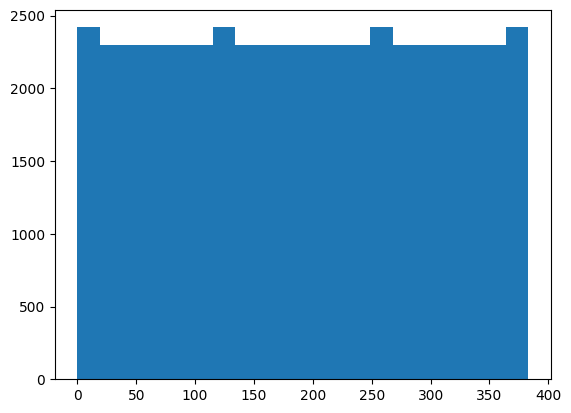

In [10]:
plt.hist(data['well_id_numeric'], bins=20)

In [122]:
correlation_WT_99 = data_WT_without_M6['well_id_numeric'].corr(data_WT_without_M6['fv_fm'])

In [123]:
print("Correlation between well_id of the WT and fv_fm for the plate 99:", correlation_WT_99)

Correlation between well_id of the WT and fv_fm for the plate 99: 0.17128600255738452


This is a little bit concerning, we may have to do another normalization step to correct for this.

### Check if the number of frames is consistent

(array([26283.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0., 26666.]),
 array([ 84.,  88.,  92.,  96., 100., 104., 108., 112., 116., 120., 124.,
        128., 132., 136., 140., 144., 148., 152., 156., 160., 164.]),
 <BarContainer object of 20 artists>)

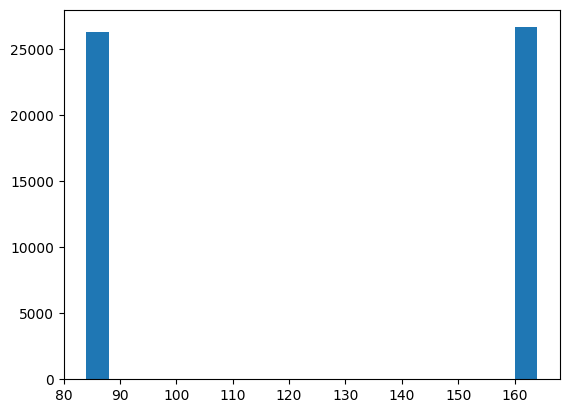

In [124]:
plt.hist(data['num_frames'], bins=20)

In [ ]:
# get the rows that have num_frames > 164

data_to_remake = data[(data['num_frames'] > 164)]

In [ ]:
data_to_remake['plate'].value_counts()

Series([], Name: plate, dtype: int64)

In [ ]:
data_to_remake

,plate,measurement,start_date,light_regime,dark_threshold,light_threshold,num_frames,i,j,fv_fm,mask_area,y2_1,y2_2,y2_3,y2_4,y2_5,y2_6,y2_7,y2_8,y2_9,y2_10,y2_11,y2_12,y2_13,y2_14,y2_15,y2_16,y2_17,y2_18,y2_19,y2_20,y2_21,y2_22,y2_23,y2_24,y2_25,y2_26,y2_27,y2_28,y2_29,y2_30,y2_31,y2_32,y2_33,y2_34,y2_35,y2_36,y2_37,y2_38,y2_39,y2_40,y2_41,y2_42,y2_43,y2_44,y2_45,y2_46,y2_47,y2_48,y2_49,y2_50,y2_51,y2_52,y2_53,y2_54,y2_55,y2_56,y2_57,y2_58,y2_59,y2_60,y2_61,y2_62,y2_63,y2_64,y2_65,y2_66,y2_67,y2_68,y2_69,y2_70,y2_71,y2_72,y2_73,y2_74,y2_75,y2_76,y2_77,y2_78,y2_79,y2_80,y2_81,npq_1,npq_2,npq_3,npq_4,npq_5,npq_6,npq_7,npq_8,npq_9,npq_10,npq_11,npq_12,npq_13,npq_14,npq_15,npq_16,npq_17,npq_18,npq_19,npq_20,npq_21,npq_22,npq_23,npq_24,npq_25,npq_26,npq_27,npq_28,npq_29,npq_30,npq_31,npq_32,npq_33,npq_34,npq_35,npq_36,npq_37,npq_38,npq_39,npq_40,npq_41,npq_42,npq_43,npq_44,npq_45,npq_46,npq_47,npq_48,npq_49,npq_50,npq_51,npq_52,npq_53,npq_54,npq_55,npq_56,npq_57,npq_58,npq_59,npq_60,npq_61,npq_62,npq_63,npq_64,npq_65,npq_66,npq_67,npq_68,npq_69,npq_70,npq_71,npq_72,npq_73,npq_74,npq_75,npq_76,npq_77,npq_78,npq_79,npq_80,npq_81,measurement_time_0,measurement_time_1,measurement_time_2,measurement_time_3,measurement_time_4,measurement_time_5,measurement_time_6,measurement_time_7,measurement_time_8,measurement_time_9,measurement_time_10,measurement_time_11,measurement_time_12,measurement_time_13,measurement_time_14,measurement_time_15,measurement_time_16,measurement_time_17,measurement_time_18,measurement_time_19,measurement_time_20,measurement_time_21,measurement_time_22,measurement_time_23,measurement_time_24,measurement_time_25,measurement_time_26,measurement_time_27,measurement_time_28,measurement_time_29,measurement_time_30,measurement_time_31,measurement_time_32,measurement_time_33,measurement_time_34,measurement_time_35,measurement_time_36,measurement_time_37,measurement_time_38,measurement_time_39,measurement_time_40,measurement_time_41,measurement_time_42,measurement_time_43,measurement_time_44,measurement_time_45,measurement_time_46,measurement_time_47,measurement_time_48,measurement_time_49,measurement_time_50,measurement_time_51,measurement_time_52,measurement_time_53,measurement_time_54,measurement_time_55,measurement_time_56,measurement_time_57,measurement_time_58,measurement_time_59,measurement_time_60,measurement_time_61,measurement_time_62,measurement_time_63,measurement_time_64,measurement_time_65,measurement_time_66,measurement_time_67,measurement_time_68,measurement_time_69,measurement_time_70,measurement_time_71,measurement_time_72,measurement_time_73,measurement_time_74,measurement_time_75,measurement_time_76,measurement_time_77,measurement_time_78,measurement_time_79,measurement_time_80,measurement_time_81,well_id,mutant_ID,feature,mutated_genes,num_mutations


### Check the number of Nan values in the dataset

In [108]:
data164frames = data[data['num_frames'] == 164]
# count the fraction of row that have a NaN value in one of the y2 columns
fraction_NaN_164frames = data164frames.filter(like='y2_').iloc[:, :80].isna().any(axis=1).sum() / len(data164frames)
print('There are ', 100*fraction_NaN_164frames, '% of time-series with NaN values in the y2 columns for 164 frames')

There are  7.256431410785269 % of time-series with NaN values in the y2 columns for 164 frames


In [109]:
data84frames = data[data['num_frames'] == 84]
# count the fraction of row that have a NaN value in one of the y2 columns before y2_41
fraction_NaN_84frames = data84frames.filter(like='y2_').iloc[:, :40].isna().any(axis=1).sum() / len(data84frames)
print('There are ', 100*fraction_NaN_84frames, '% of time-series with NaN values in the y2 columns before y2_41 for 84 frames')

There are  7.434463341323289 % of time-series with NaN values in the y2 columns before y2_41 for 84 frames


### Check the number of plate 

In [125]:
data['plate'].value_counts()/384

plate
99    7.979167
2     5.984375
20    5.984375
1     5.984375
23    5.984375
22    5.984375
21    5.984375
18    5.984375
8     5.984375
16    5.984375
15    5.984375
14    5.984375
13    5.984375
11    5.984375
10    5.984375
9     5.984375
3     5.984375
24    5.234375
12    4.986979
17    4.986979
7     4.986979
6     4.986979
5     4.986979
4     3.989583
Name: count, dtype: float64

### Check if the fv_fm values are not the same between to consecutive days

In [ ]:
# Check if the fv_fm values are not the same between to consecutive days

99    12.0
18     6.0
8      6.0
5      6.0
7      6.0
      ... 
14     4.0
3      4.0
2      3.0
12     3.0
4      3.0
Name: plate, Length: 18, dtype: float64

### Check if there are some negative values in the y2 data

In [126]:
# Check if there are some negative values in the y2 data
data.filter(like='y2_').lt(0).sum().sum()

1511

In [24]:
# get the rows that have negative values in the y2 data
negative_rows = data[data.filter(like='y2_').lt(0).any(axis=1)]
negative_rows

,plate,measurement,start_date,light_regime,dark_threshold,light_threshold,num_frames,i,j,fv_fm,...,well_id,mutant_ID,feature,mutated_genes,num_mutations,fv_fm_end,well_id_numeric,mean_y2,median,log_likelihood_null
770,2,M1,2023-10-18,1min-1min,17.607635,25.893194,164,0,2,0.547058,...,A03,LMJ.RY0402.071251,MULTIPLE_SPLICE_VARIANTS,"Cre11.g479350,Cre07.g343933",2.0,0.489591,2,0.299502,None,None
963,2,M1,2023-10-18,1min-1min,17.607635,25.893194,164,8,3,0.436100,...,I04,LMJ.RY0402.063672,"3'UTR,CDS",Cre02.g146750,1.0,0.396992,195,0.200067,None,None
1056,2,M1,2023-10-18,1min-1min,17.607635,25.893194,164,12,0,0.568147,...,M01,LMJ.RY0402.061439,intron,Cre12.g528250,1.0,0.48913,288,0.303976,None,None
1104,2,M1,2023-10-18,1min-1min,17.607635,25.893194,164,14,0,0.672342,...,O01,LMJ.RY0402.063493,CDS,Cre12.g516450,1.0,0.559224,336,0.354824,None,None
1142,2,M1,2023-10-18,1min-1min,17.607635,25.893194,164,15,14,0.600734,...,P15,LMJ.RY0402.072442,intron,Cre06.g303751,1.0,0.673159,374,0.379487,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46220,20,M2,2024-04-07,20h_HL,15.370542,25.490716,84,5,20,0.574723,...,F21,LMJ.RY0402.062276,"intron,CDS",Cre12.g510350,1.0,0.360055,140,0.040806,None,None
46222,20,M2,2024-04-07,20h_HL,15.370542,25.490716,84,5,22,0.582876,...,F23,LMJ.RY0402.062258,"MULTIPLE_SPLICE_VARIANTS,-",Cre12.g550800,1.0,0.418413,142,0.053917,None,None
46254,20,M2,2024-04-07,20h_HL,15.370542,25.490716,84,7,6,0.515702,...,H07,LMJ.RY0402.070753,intron,Cre12.g542250,1.0,0.37664,174,0.059814,None,None
46367,20,M2,2024-04-07,20h_HL,15.370542,25.490716,84,11,23,0.647076,...,L24,LMJ.RY0402.098018,intron,Cre01.g023750,1.0,0.435191,287,0.124314,None,None


At this point, we have checked that the data is consistent and that there are no major issues with it. We can now proceed to the analysis. In order to do so, we first remove the Nan values and the anomalies in the data, that we have identified in the previous steps.

In [ ]:
# Remove the rows that have an anomaly in their number of frames or fv_fm values
data = data[data['num_frames'] <= 164]
data = data.dropna(subset=['fv_fm'])

data_WT = data[data['plate'] == 99]
data_not_WT = data[data['plate'] != 99]
data_1min = data[data['light_regime'] == '1min-1min']
data_ML = data[data['light_regime'] == '20h_ML']
data_HL = data[data['light_regime'] == '20h_HL']
data_30s = data[data['light_regime'] == '30s-30s']
data_2h = data[data['light_regime'] == '2h-2h']
data_10min = data[data['light_regime'] == '10min-10min']